# SA

In [1]:
import networkx as nx
from networkx.exception import PowerIterationFailedConvergence
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
def compute(G,num_vertices):
    centralities = []
    try: 
        degree_centrality = nx.degree_centrality(G)
        centralities.append(degree_centrality)
        betweenness_centrality = nx.betweenness_centrality(G)
        centralities.append(betweenness_centrality)
        closeness_centrality = nx.closeness_centrality(G)
        centralities.append(closeness_centrality)
        eigenvector_centrality = nx.eigenvector_centrality(G)
        centralities.append(eigenvector_centrality)
    except PowerIterationFailedConvergence:
        num_edges = random.randint(1, num_vertices*(num_vertices-1)//2)
        G = nx.dense_gnm_random_graph(num_vertices, num_edges)
        centralities = []
        compute(G,num_vertices)

    return centralities


In [73]:
def cost_function(centralities):
    max_nodes_list = []
    for centrality in centralities:
        max_value = max(centrality.values())
        max_nodes = [node for node, value in centrality.items() if value == max_value]
        max_nodes_list.append(max_nodes)
    #print(max_nodes_list)
    unique_max_nodes = []
    [unique_max_nodes.extend(nodes) for nodes in max_nodes_list]
    diff = abs(sum(len(max_node) for max_node in max_nodes_list) - 4)
    unqi = abs(len(set(unique_max_nodes)) - 4)
    #print(f"diff{diff},unqi{unqi}")
    cost = math.sqrt(pow(diff, 2) + pow(unqi, 2))

    return cost

In [74]:
def mutate_graph(G, mutation_rate):
    if random.random() < mutation_rate:
        mutation_type = random.randint(1, 3)
        if mutation_type == 1:
            # Add a new edge between two existing nodes with random weight
            nodes = list(G.nodes)
            if len(nodes) > 1:
                source, target = random.sample(nodes, 2)
                edge_weight = random.random()
                G.add_edge(source, target, weight=edge_weight)
        elif mutation_type == 2:
            # Remove a random edge from the graph
            num_edges_to_remove = random.randint(1, 3)
            for i in range(num_edges_to_remove):
                if len(G.edges) > 0:
                    source, target = random.choice(list(G.edges))
                    G.remove_edge(source, target)
        elif mutation_type == 3:
            # Change the weight of a random edge in the graph
            if len(G.edges) > 0:
                source, target = random.choice(list(G.edges))
                edge_weight = random.random()
                G[source][target]['weight'] = edge_weight
        return G
    else:
        return G

In [75]:
def simulated_annealing(G, num_vertices, T0, alpha, mutation_rate, max_iterations):
    # Compute the initial centrality measures and cost
    centrality_measures = compute(G, num_vertices)
    cost = cost_function(centrality_measures)

    # Initialize the best graph and its cost
    best_G = G.copy()
    best_cost = cost

    # Initialize the temperature
    T = T0

    # Initialize the lists to store the cost at each iteration
    costs = []
    avg_costs = []
    best_costs = [best_cost]

    # Loop over the iterations
    for i in tqdm(range(max_iterations)):
        # Mutate the graph
        new_G = mutate_graph(G, mutation_rate)

        # Compute the new centrality measures and cost
        new_centrality_measures = compute(new_G, num_vertices)
        new_cost = cost_function(new_centrality_measures)

        # Calculate the energy difference
        delta_E = new_cost - cost

        # Accept or reject the new graph
        if delta_E < 0 or random.random() < math.exp(-delta_E / T):
            G = new_G
            centrality_measures = new_centrality_measures
            cost = new_cost

            # Update the best graph if needed
            if cost < best_cost:
                best_G = G.copy()
                best_cost = cost
                if best_cost == 0:
                    print(f"Found graph at{i}th iteration")
                    nx.draw(best_G, with_labels=True)
                    plt.show()

        # Update the costs for this iteration
        costs.append(cost)
        avg_cost = np.mean(costs)
        avg_costs.append(avg_cost) 
        best_costs.append(best_cost)

        # Reduce the temperature
        T *= alpha

    # Plot the curves of cost, average, and best
    iterations = range(max_iterations)
    plt.plot(iterations, costs, label='Cost')
    plt.plot(iterations, avg_costs, label='Average')
    #plt.plot(iterations, best_costs[:-1], label='Best')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()

    return best_G, best_cost


100%|████████████████████████████████████| 20000/20000 [00:20<00:00, 967.13it/s]


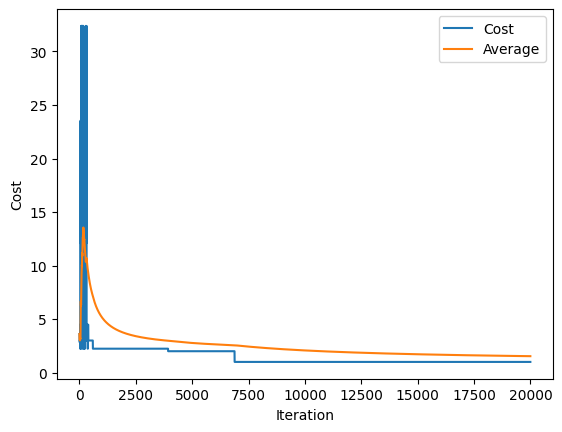

In [80]:
num_vertices = 9
num_edges = random.randint(1, num_vertices*(num_vertices-1)//2)
G = nx.dense_gnm_random_graph(num_vertices, num_edges)

mutation_rate= 0.9
T0=100
alpha=0.99
max_iterations=20000

best_G, best_cost = simulated_annealing(G, num_vertices, T0, alpha, mutation_rate, max_iterations)



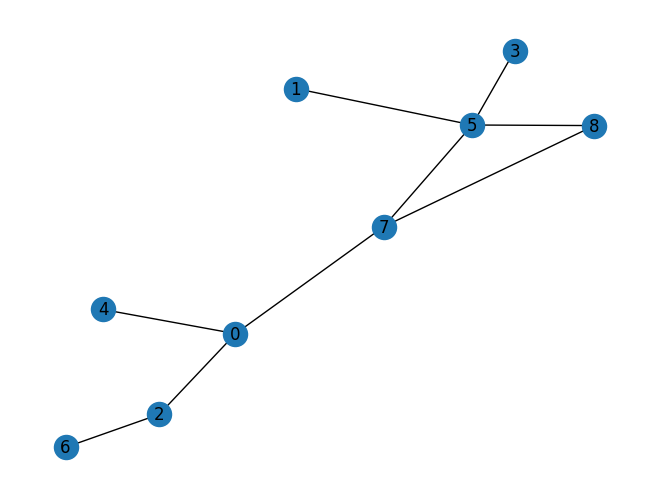

[[5], [0], [7], [5]]
diff0,unqi1


1.0

In [81]:
def cost_function_b(centralities):
    max_nodes_list = []
    for centrality in centralities:
        max_value = max(centrality.values())
        max_nodes = [node for node, value in centrality.items() if value == max_value]
        max_nodes_list.append(max_nodes)
    print(max_nodes_list)
    unique_max_nodes = []
    [unique_max_nodes.extend(nodes) for nodes in max_nodes_list]
    diff = abs(sum(len(max_node) for max_node in max_nodes_list) - 4)
    unqi = abs(len(set(unique_max_nodes)) - 4)
    print(f"diff{diff},unqi{unqi}")
    cost = math.sqrt(pow(diff, 2) + pow(unqi, 2))

    return cost
nx.draw(best_G, with_labels=True)
plt.show()
centralities = compute(best_G,num_vertices)
cost_function_b(centralities)